# Using Polynomial Regression to Improve Model Performance on the Boston Housing Dataset

In this program we will be utilising the Boston Housing dataset again (available from sklearn). However, on this occasion we will only be using a single feature in order to visualise how poynomial regression functions and when it is advantageous to employ this model instead of linear regression.

We begin by loading the dataset, creating a dataframe and shuffling the data to ensure there are no patterns or biases.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle
import seaborn as sns

boston = load_boston()
# boston is imported as a bunch, a subclass of dictionary type
# load as a DataFrame
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
# add the target data to df
df['MEDV'] = boston.target
# shuffle data frame before use with sklearn
df = shuffle(df)

The feature we are going to use is the one most strongly correlated with the target (which we found was MEDV in the previous program). 

In [2]:
# assign feature to X and target to y
# reshape for sklearn
X = df['LSTAT'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

These variables are described as follows:

LSTAT   % lower status of the population

MEDV Median value of owner-occupied homes in 1000's

Let's plot the data.

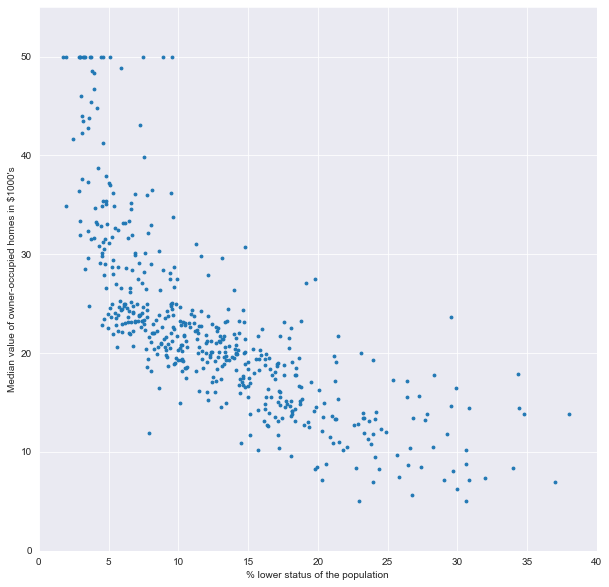

In [3]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
sns.set_style('darkgrid')
ax.set_xlabel('% lower status of the population')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
ax.set_xlim(0, 40)
ax.set_ylim(0, 55)
ax.scatter(X, y, s = 8)
plt.show()

First we will fit a linear regression model (without regularisation) to the data and return the average cross-validated coefficient of determination, $R^2$.

In [4]:
# instantiate regressor
lin_reg = LinearRegression()
# perform cross-validation and take the mean score
lin_reg_cv = np.mean(cross_val_score(lin_reg, X, y, cv = 5, scoring = 'r2'))
print('Mean cross-validated R^2: {:.2f}'.format(lin_reg_cv))

Mean cross-validated R^2: 0.53


We can add this regression line to the plot.

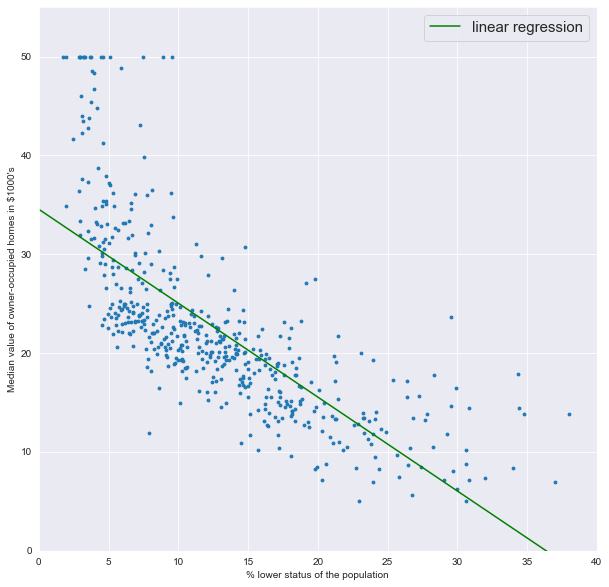

In [5]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
ax.set_xlabel('% lower status of the population')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
ax.set_xlim(0, 40)
ax.set_ylim(0, 55)
ax.scatter(X, y, s = 8)

# generate points for plotting
x = np.linspace(0, 40, 100).reshape(-1, 1)
# get the corresponding y values
lin_reg.fit(X, y)
y_plot = lin_reg.predict(x)
# plot line
ax.plot(x, y_plot, color = 'g', label = 'linear regression')
plt.legend(prop = {'size': 15})
plt.show()

From the coefficient of determination and observing the plot it is evident that the linear regression model is not well suited for predictions on this data. It is expected that a ploynomial curve will provide a better fit.

Say we have a single feature $x$. The linear regression model will have the form $$h_\theta(x) = \theta_0 + \theta_1x$$In polynomial regression we replace this with $$h_\theta(x) = \theta_0 + \theta_1x +\theta_2x^2 + \theta_3x^3 + ... + \theta_nx^n$$ Therefore we can see that polynomial regression is just a special case of multiple linear regression where the features are the powers of our original feature $x$.

We are going to fit a polynomial curve of degree 2 to the data, that is we are going to use the model $$h_\theta(x) = \theta_0 + \theta_1x +\theta_2x^2\tag{1}$$ 

By comparing equation $(1)$ with $h_\theta(x) = \Theta^TX$, where $\Theta$ is the vector of parameters and $X$ is the vector of features, we see that the first element of $X$ is equal to $1$. The second and third elements of $X$ are clearly $x$ and $x^2$, respectively. 

We are going to use PolynomialFeatures to generate additional polynomial features for our single feature.

In [6]:
# PolynomialFeatures generates all polynomial combinations of the feature up to the specified degree
poly = PolynomialFeatures(degree = 2)
# fit and transform the X feature
X_poly = poly.fit_transform(X)
print(X[0:5])
print(X_poly[0:5])

[[ 2.97]
 [12.03]
 [ 5.68]
 [13.27]
 [30.81]]
[[  1.       2.97     8.8209]
 [  1.      12.03   144.7209]
 [  1.       5.68    32.2624]
 [  1.      13.27   176.0929]
 [  1.      30.81   949.2561]]


For each sample in our new feature array the first element is equal to $1$, the second to $x$, and the third to $x^2$, just as we were expecting.

Now we perform the cross-validated regression again, but using the polynomial features.

In [7]:
# instantiate regressor
lin_reg2 = LinearRegression()
# perform cross-validation and take the mean score
lin_reg_cv2 = np.mean(cross_val_score(lin_reg2, X_poly, y, cv = 5, scoring = 'r2'))
print('Mean cross-validated R^2: {:.2f}'.format(lin_reg_cv2))

Mean cross-validated R^2: 0.63


Model performance has substantially improved. Let's plot the polynomial curve to see the fit.

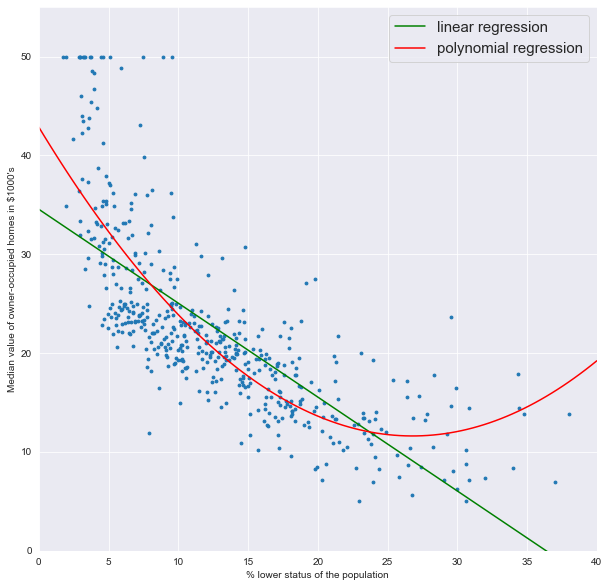

In [8]:
# generate plot
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
ax.set_xlabel('% lower status of the population')
ax.set_ylabel("Median value of owner-occupied homes in $1000's")
ax.set_xlim(0, 40)
ax.set_ylim(0, 55)
ax.scatter(X, y, s = 8)

# fit regression model to the polynomial features
lin_reg2.fit(X_poly, y)
# get the y coordinates for the plot
# the coefficients trained by the model are applied to the x plotting points to produce a continuous curve
poly_y = lin_reg2.predict(poly.fit_transform(x))
# plot regression lines
ax.plot(x, y_plot, color = 'g', label = 'linear regression')
ax.plot(x, poly_y, color = 'r', label = 'polynomial regression')
ax.legend(prop = {'size': 15})
plt.show()